# DATA Exploration

Dataset Overview

The provided dataset appears to be a sales order dataset, containing information about individual orders, customers, products, and shipping details.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import plotly.express as px

# Load the dataset
df = pd.read_csv('/content/Global-Superstore - Global-Superstore.csv.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9.0,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5.0,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8.0,0.0,311.5200,903.04,Critical


In [4]:
df.shape

(35851, 24)

As we see here, the dataset has 24 columns and 51290 rows and now we go further and work with the data preprocessing and understanding the dataset better and what all could we infer from the dataset. So, here it goes

Here are the first five rows of the dataset and last five rows of the dataset

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9.0,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5.0,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8.0,0.0,311.5200,903.04,Critical


In [6]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
35846,40654,CA-2013-168046,1/25/2013,1/28/2013,Second Class,JD-15895,Jonathan Doherty,Corporate,New York City,New York,...,OFF-BI-10003676,Office Supplies,Binders,"GBC Standard Recycled Report Covers, Clear Pla...",43.120,5.0,0.2,15.092,3.34,Medium
35847,43930,TU-2014-7980,1/18/2014,1/25/2014,Standard Class,HR-4830,Harold Ryan,Corporate,Van,Van,...,TEC-SAN-10004027,Technology,Accessories,"SanDisk Memory Card, Bluetooth",44.964,1.0,0.6,-52.836,3.34,Medium
35848,45846,TU-2012-9080,6/23/2012,6/29/2012,Standard Class,PW-9030,Pauline Webber,Corporate,Nazilli,Aydin,...,TEC-EPS-10001323,Technology,Machines,"Epson Calculator, Wireless",37.128,2.0,0.6,-9.312,3.34,Medium
35849,49436,SF-2012-9090,9/15/2012,9/19/2012,Second Class,AM-360,Alice McCarthy,Corporate,Johannesburg,Gauteng,...,OFF-CAM-10003933,Office Supplies,Envelopes,"Cameo Business Envelopes, Recycled",38.700,2.0,0.0,4.200,3.34,Medium
35850,49736,PL-2013-2260,1/20/2013,1/24/2013,Second Class,SC-10680,Steve Carroll,Home Office,Katowice,Si,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The datatypes of each and every column in the dataset- Object which is String data are 17, Float values are 5 and Integer are 2 and hence now we go further with our analysis

In [7]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
City,object
State,object


In [8]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


As we see here, there are no missing values in the columns except for Postal Code

In [9]:
df.duplicated().sum()

0

No duplicate values as well

In [10]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,35851.000000,5835.000000,35850.000000,35850.000000,35850.000000,35850.000000,35850.000000
mean,24393.234024,54885.910026,340.291356,3.887755,0.120159,40.422117,37.054337
std,14394.906691,32448.849538,555.723623,2.378014,0.186597,206.506861,65.709325
min,2.000000,1040.000000,7.968000,1.000000,0.000000,-6599.978000,3.340000
25%,12397.500000,22204.000000,73.080000,2.000000,0.000000,1.680000,7.060000
50%,23589.000000,54703.000000,154.550000,3.000000,0.000000,19.440000,15.040000
75%,36330.000000,90008.000000,372.960000,5.000000,0.200000,60.115000,37.460000
max,51289.000000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


1. The postal codes vary significantly, with a broad range of values. This indicates a wide geographical spread of orders. As missing postal codes are significant, further investigation into data quality or completeness is needed.
2. Sales figures vary widely, with a high standard deviation indicating that some transactions are significantly larger than others. The median is much lower than the mean, suggesting that a small number of high-value transactions are skewing the average.
3. The quantity of items sold in each transaction is relatively low, with most transactions involving 3 to 5 items. The wide range and high standard deviation suggest variability in order sizes, with some orders significantly larger than others.
4. Most transactions do not have a discount (0.00 is very common), but there is a significant range in discount percentages, suggesting that some transactions receive substantial discounts. This could impact sales revenue and profitability.
5. There is a wide range in profit values, including significant losses, which indicates that some transactions are unprofitable. The median profit is much lower than the mean, suggesting that high profits from a few transactions are skewing the average.
6. Shipping costs vary widely, with some very high costs in the dataset. Most shipping costs are relatively low, but a few orders have extremely high shipping charges. This variability may reflect different shipping methods or destinations.

# DATA Preprocessing

As we noticed earlier that many of the variables are of categorical type, so we modify the necessary changes such as the dates being changed to date format and Postal Code to string to avoid issues with NaN

We also plot the correlation matrix for all the numerical data

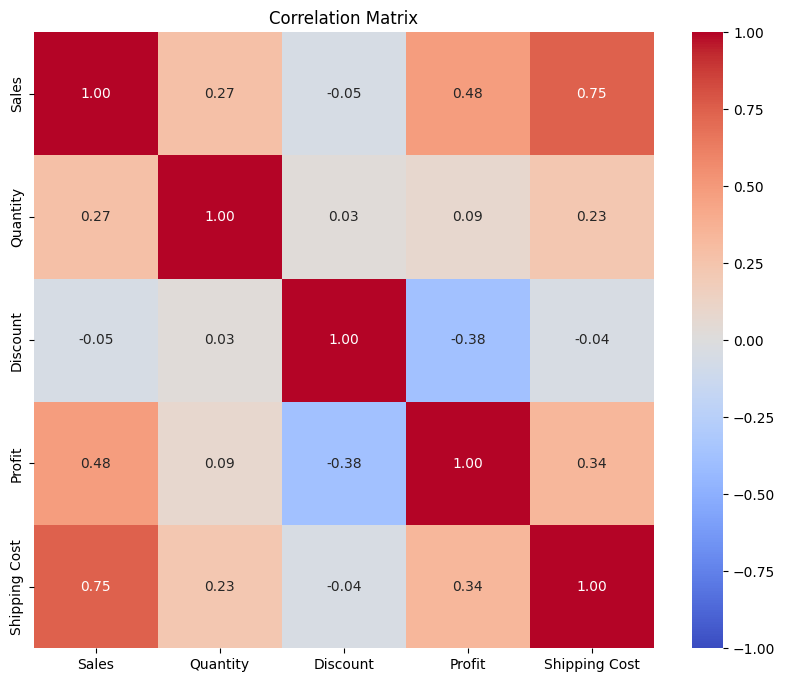

In [11]:
# Converting date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Converting Postal Code to string
df['Postal Code'] = df['Postal Code'].astype('str')

# Selecting numerical columns
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']
df_numerical = df[numerical_cols]

# Calculating the correlation matrix
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Drawing the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

# Plotting
plt.show()


Sales and Profit (0.48): There is a moderate positive correlation between sales and profit, indicating that as sales increase, profit tends to increase as well. This suggests that higher sales are generally associated with higher profitability.

Sales and Shipping Cost (0.77): A strong positive correlation is observed between sales and shipping costs. This indicates that as sales volumes rise, shipping costs also increase significantly, highlighting a direct relationship between sales growth and the associated costs of shipping.

Quantity and Profit (0.10): The correlation between quantity and profit is weakly positive, suggesting that increases in quantity have a slight effect on profit. However, this relationship is not substantial.

Quantity and Shipping Cost (0.27): There is a moderate positive correlation between quantity and shipping costs. This indicates that while shipping costs tend to increase with quantity, the effect is moderate.

Discount and Profit (-0.32): A moderate negative correlation exists between discount levels and profit. This implies that as discounts increase, profit tends to decrease, suggesting a potential trade-off between discounting practices and profitability.

Discount and Other Variables: The correlations between discount and sales, quantity, and shipping costs are close to zero, indicating that discount levels have little to no direct linear relationship with these variables.

The correlation matrix indicates moderate to strong positive correlations between sales, quantity, profit, and shipping cost. There is a weak positive correlation between quantity and shipping cost. Discount appears to be negatively correlated with profit and weakly negatively correlated with shipping cost.

Matrix shows that sales are highly correlated with both profit and shipping costs. This suggests that sales could be a good predictor of both of these variables.

We check for the distribution of categorical columns

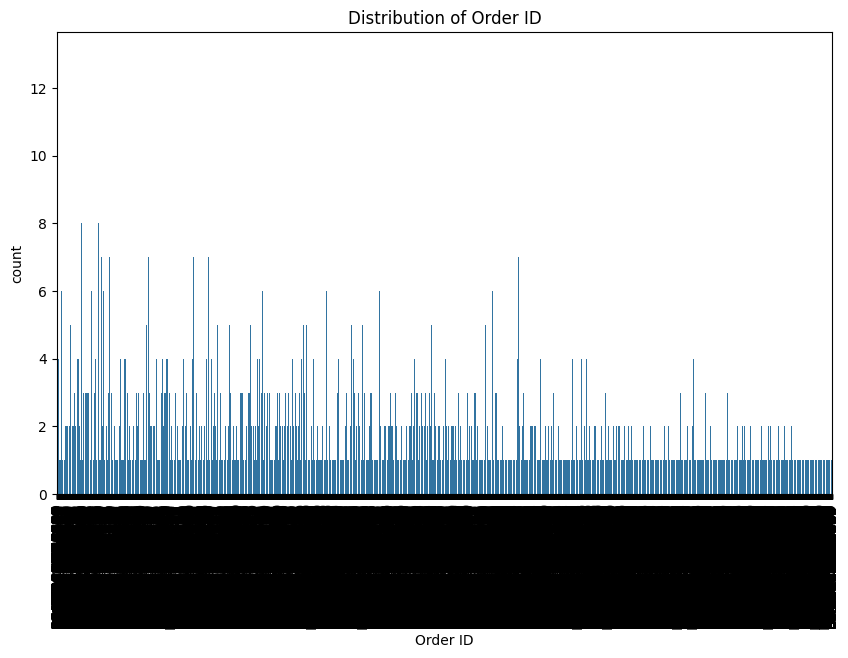

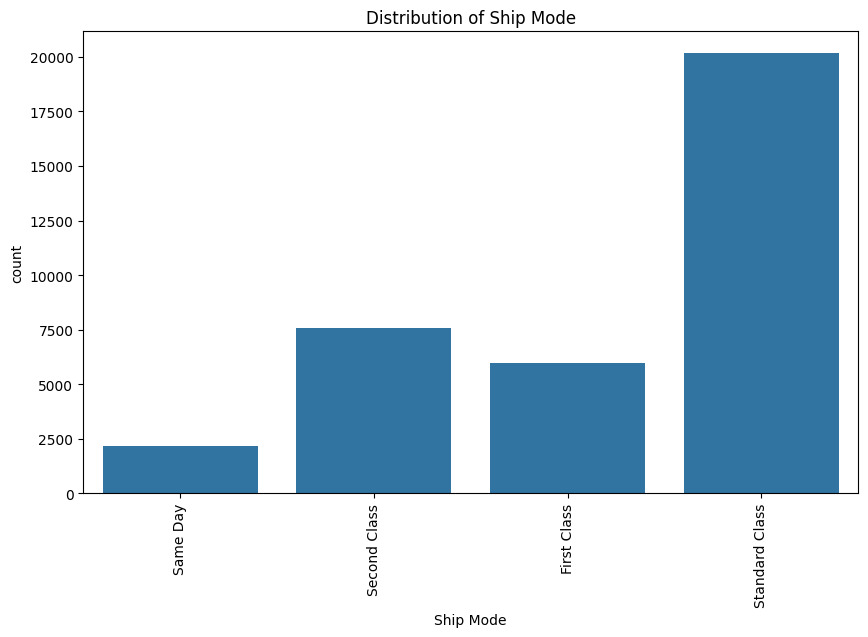

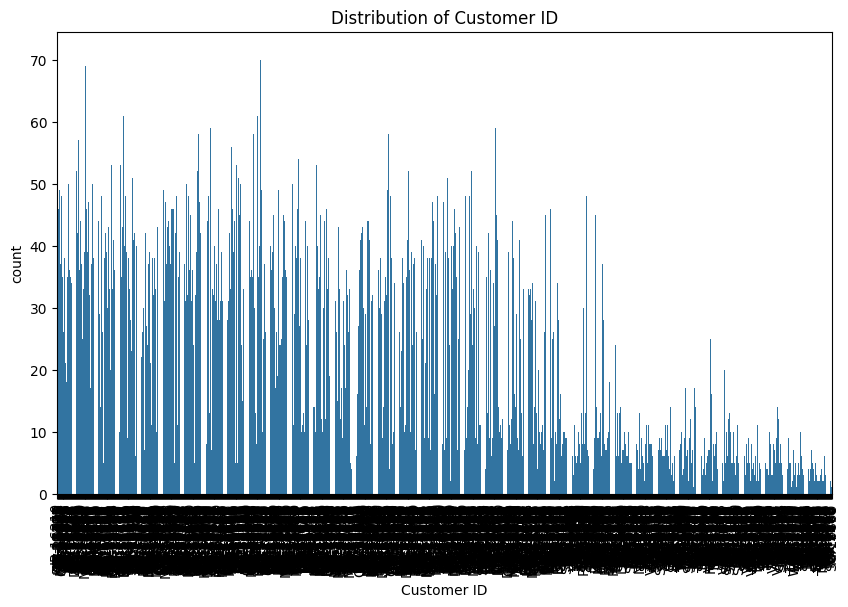

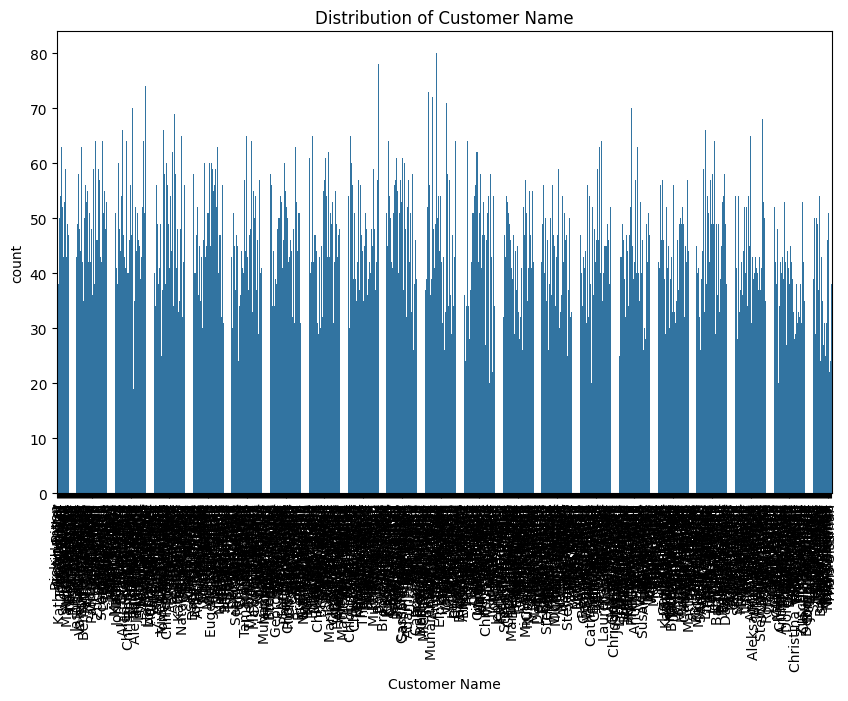

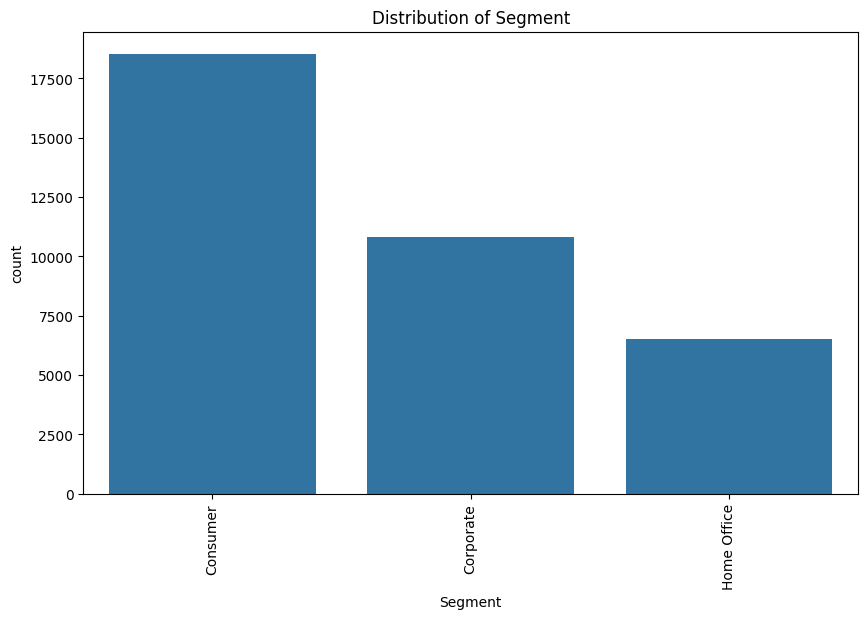

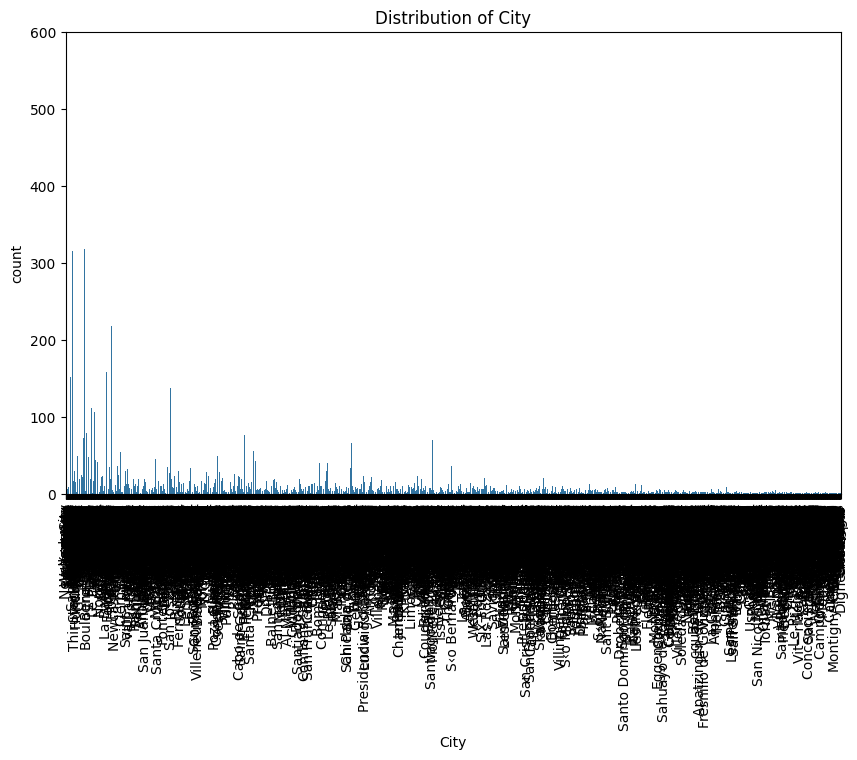

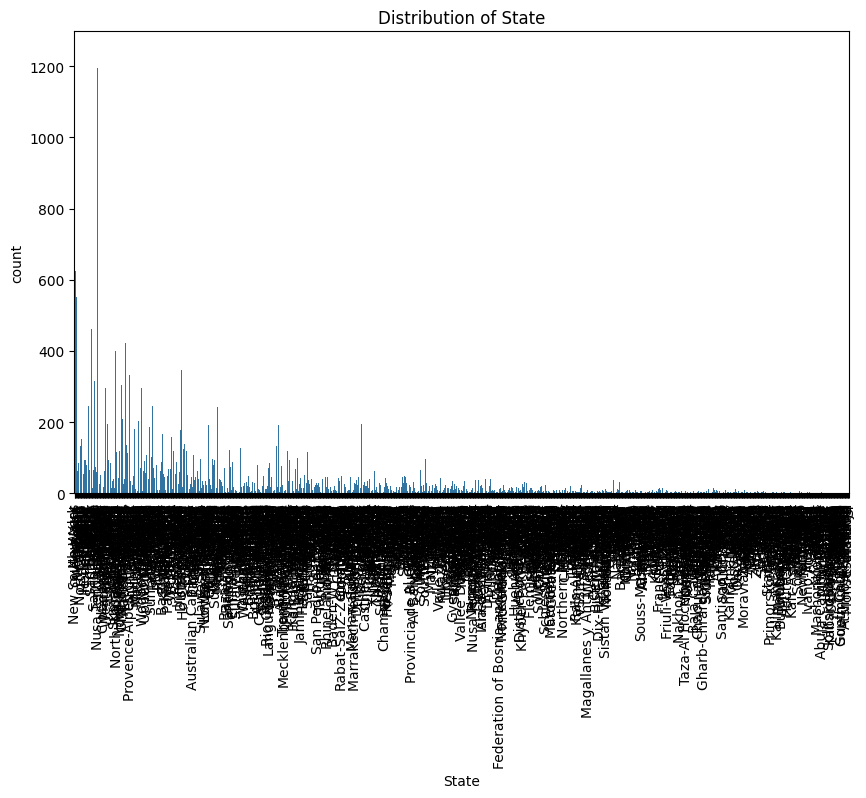

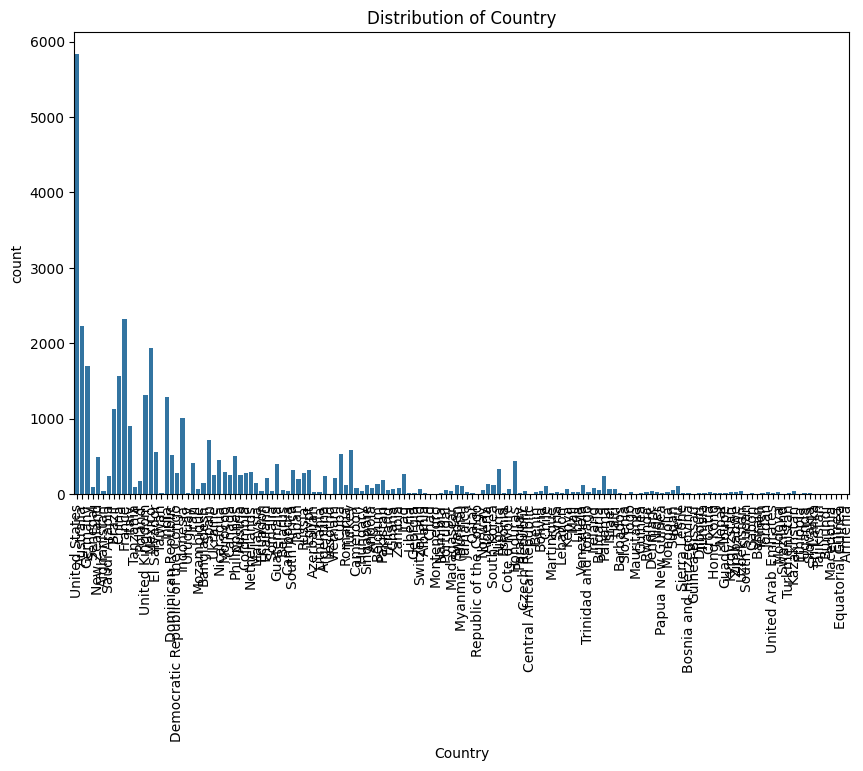

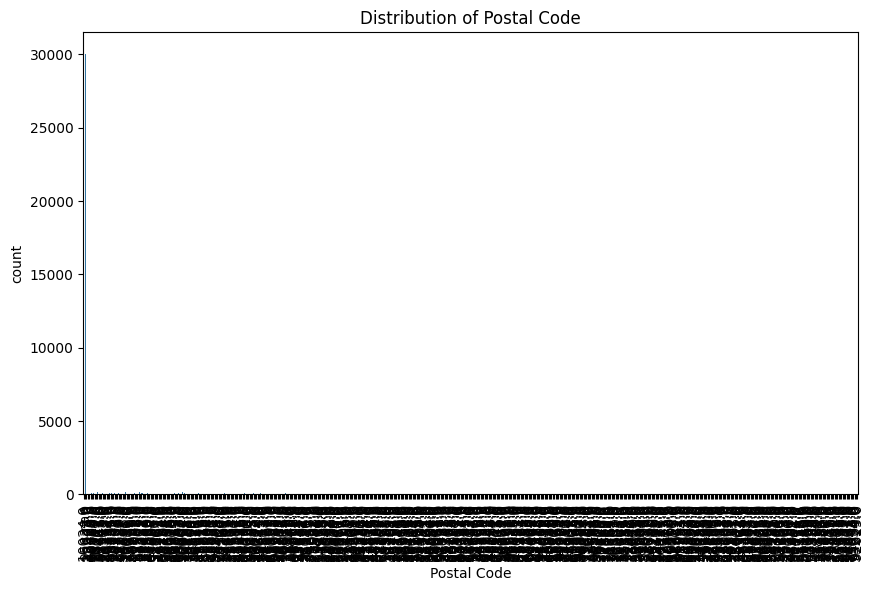

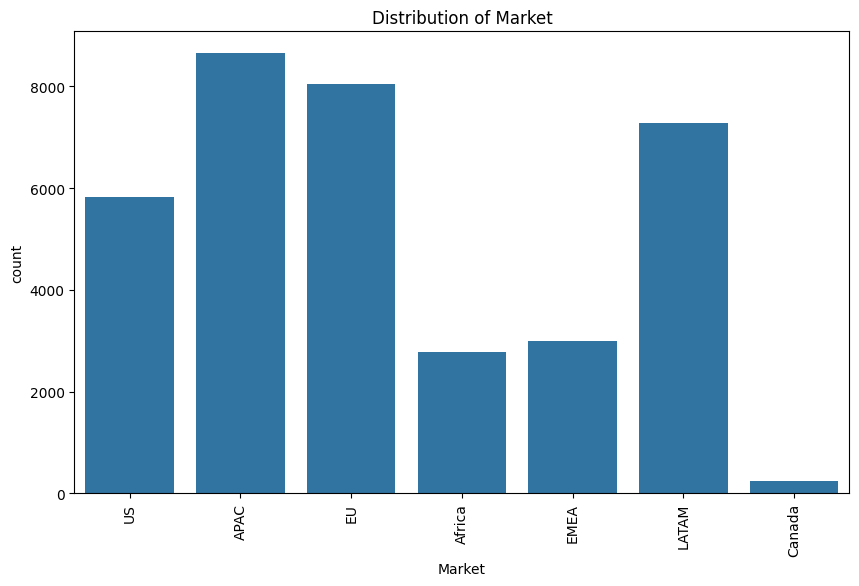

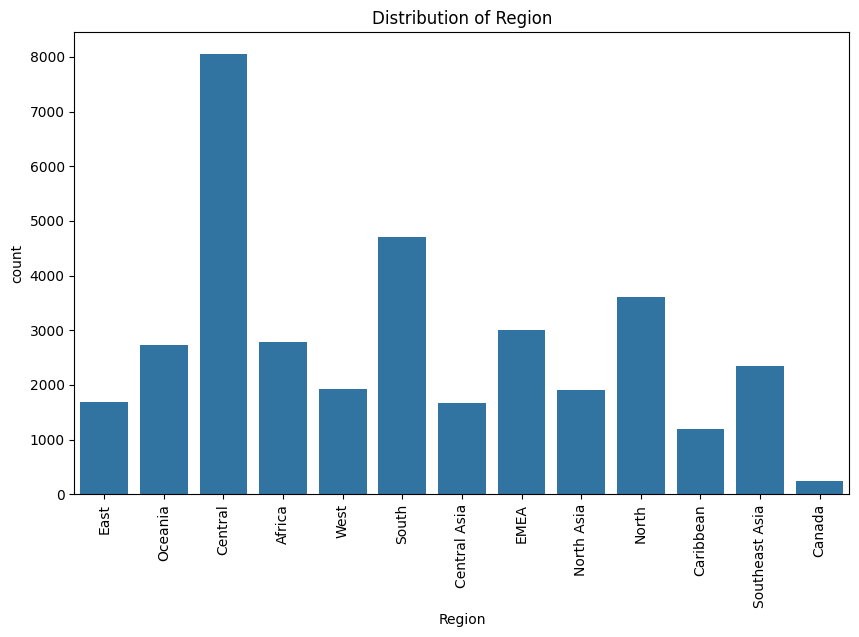

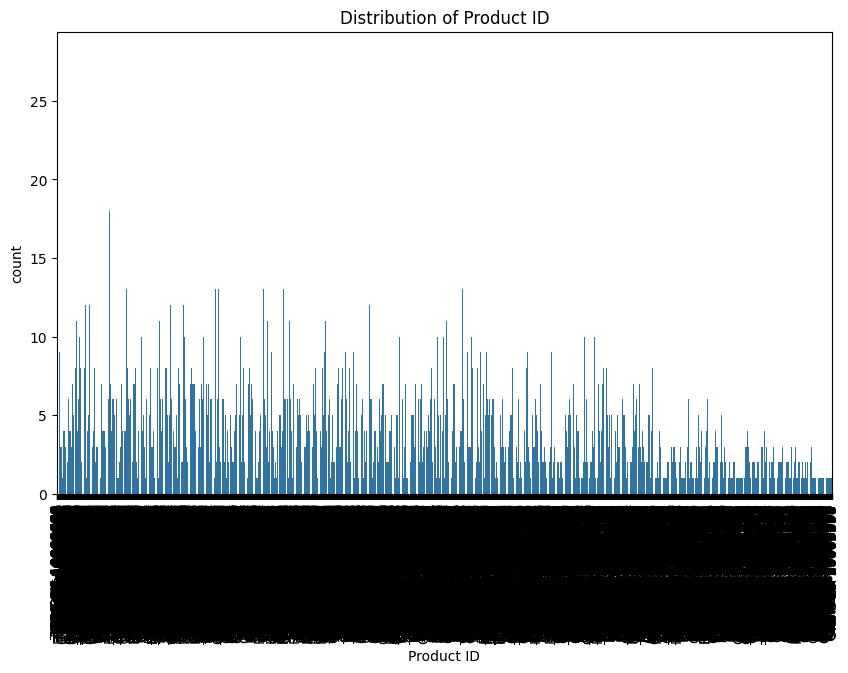

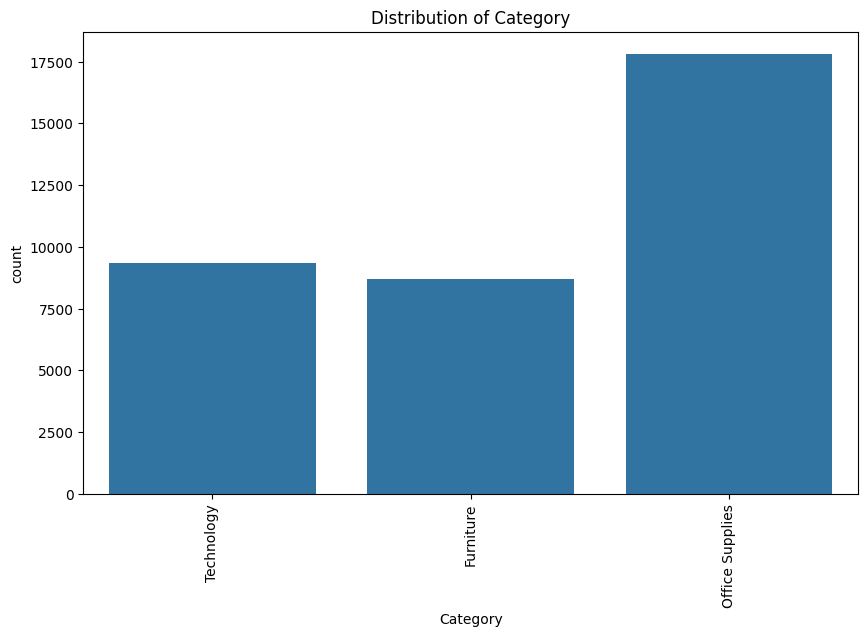

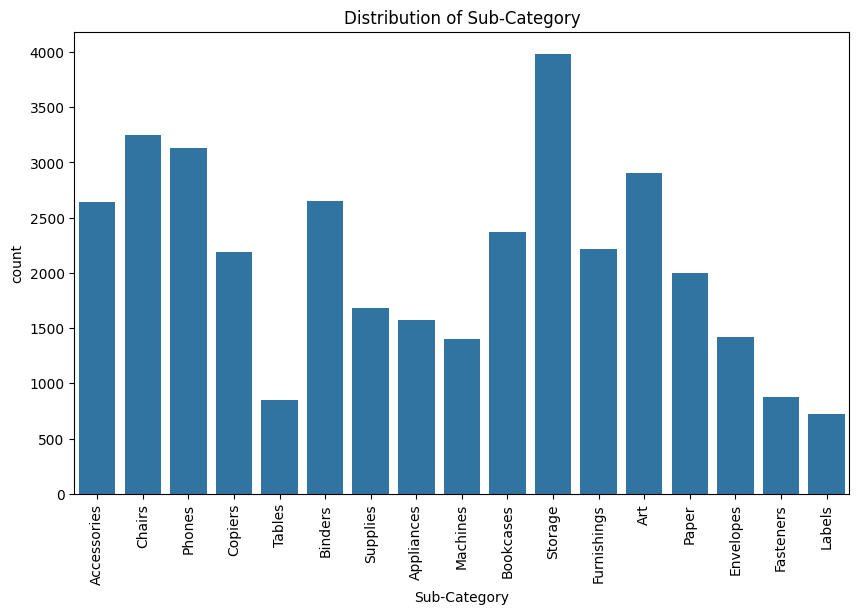

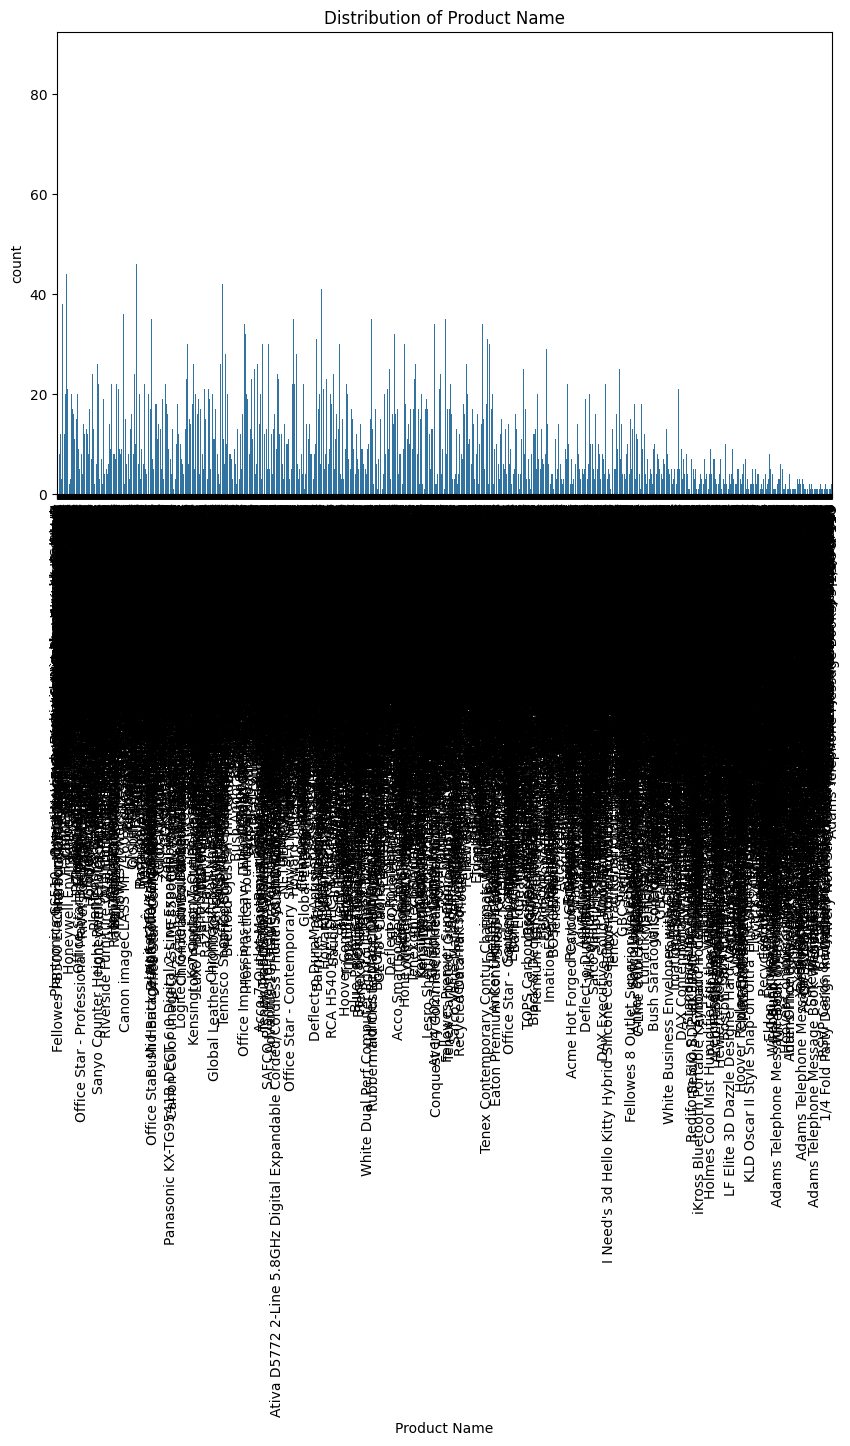

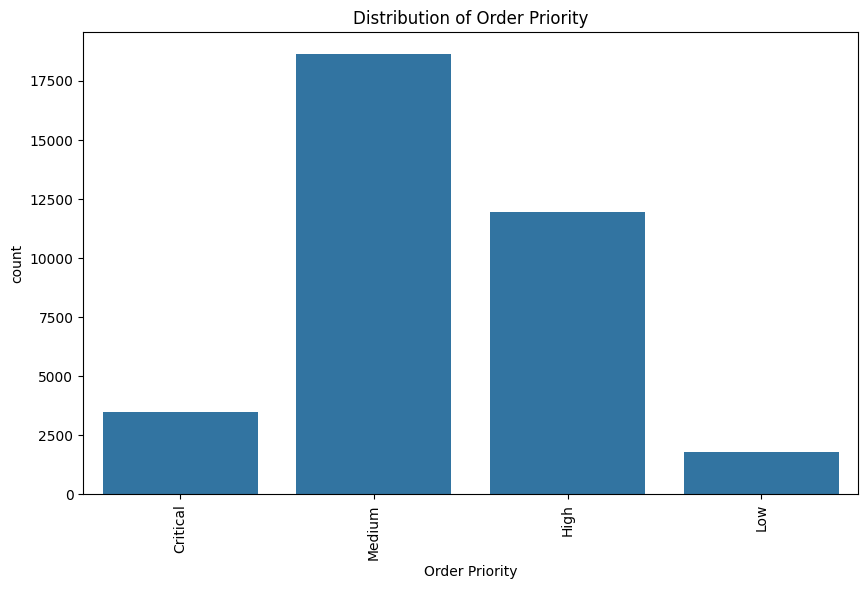

In [12]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])  # Pass 'x' keyword argument
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability
    plt.show()

Ship Mode Distribution: Most orders are shipped via Standard Class, we can evaluate the cost-effectiveness of this mode compared to express options.

Segment Distribution: The Consumer segment dominates, so, we focus on personalizing offers and promotions for this segment, while exploring opportunities to grow Corporate or Home Office segments.

Category Distribution: If a few categories make up the majority of sales, consider expanding product lines in those categories or promoting underrepresented ones to balance inventory. As in this case, it is Office supplies, we expnd that product line.

Order Priority Distribution: A high proportion of orders are marked as Medium Priority, ensuring that our team has the resources to handle these effectively and efficiently.

Region Distribution: If certain regions are underperforming, investigate potential causes such as market saturation or competitive activity, and develop targeted strategies to improve performance. As in our case Canada is performing not that well, we understand the reasons behind and help with the analysis and also eradicatie or lessen the issue.

We check for outliers

In [13]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f'Outliers in {col}: {df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]}')

Outliers in Row ID: 0
Outliers in Sales: 3559
Outliers in Quantity: 832
Outliers in Discount: 1732
Outliers in Profit: 6298
Outliers in Shipping Cost: 3785


Outliers in Row ID: 0


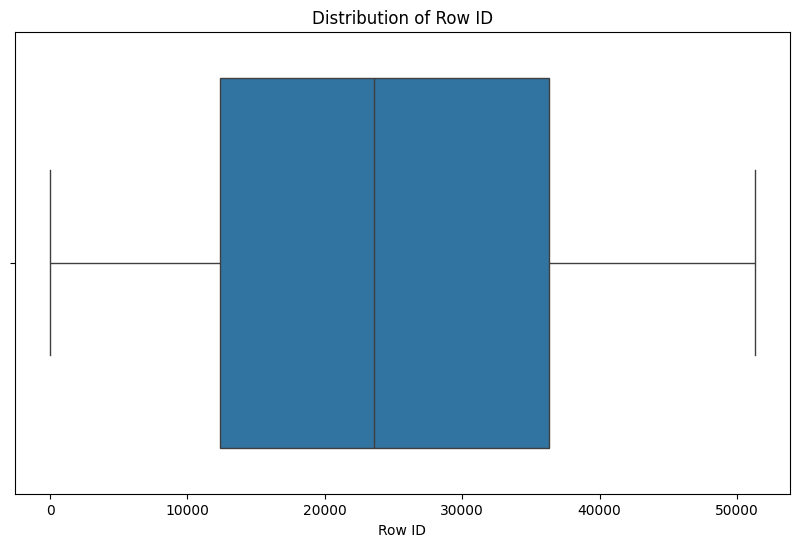

Outliers in Sales: 3559


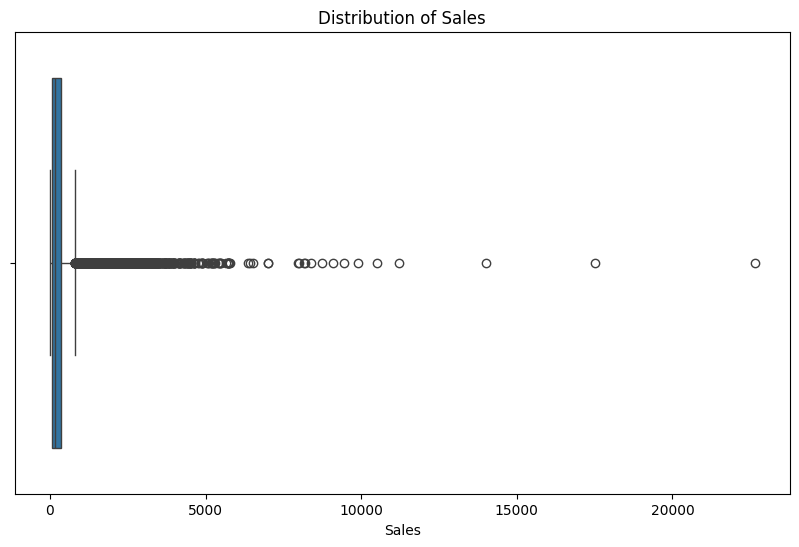

Outliers in Quantity: 832


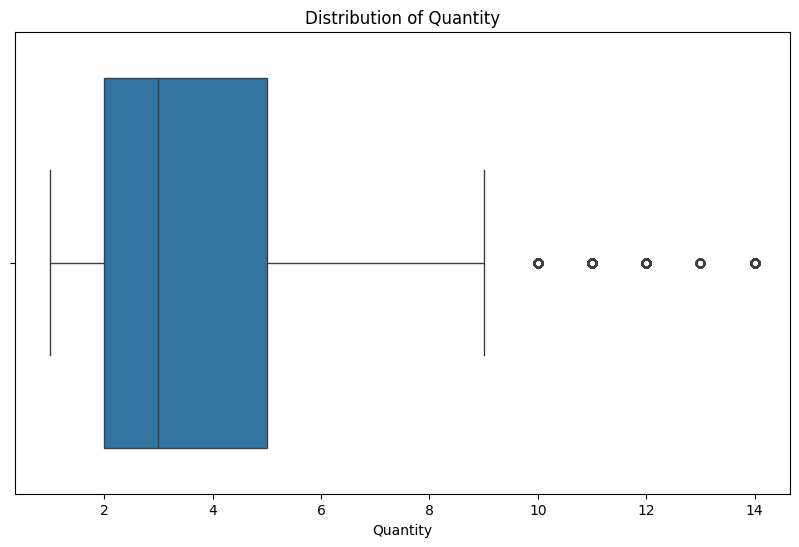

Outliers in Discount: 1732


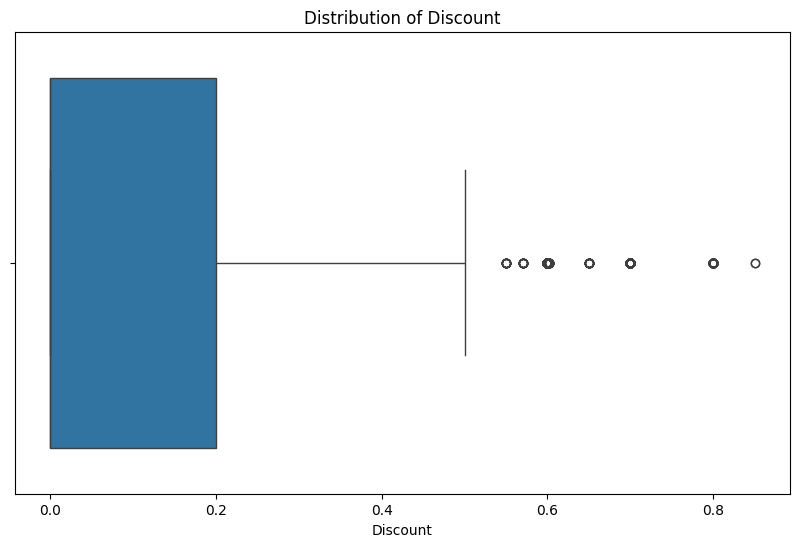

Outliers in Profit: 6298


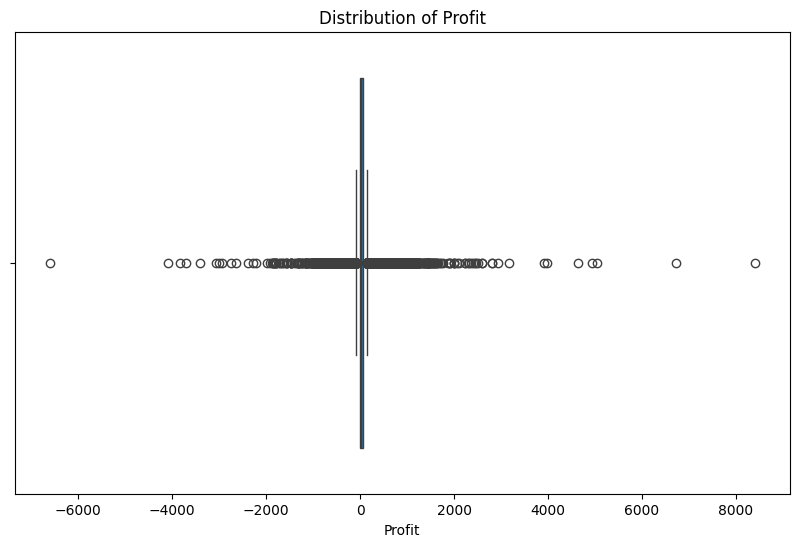

Outliers in Shipping Cost: 3785


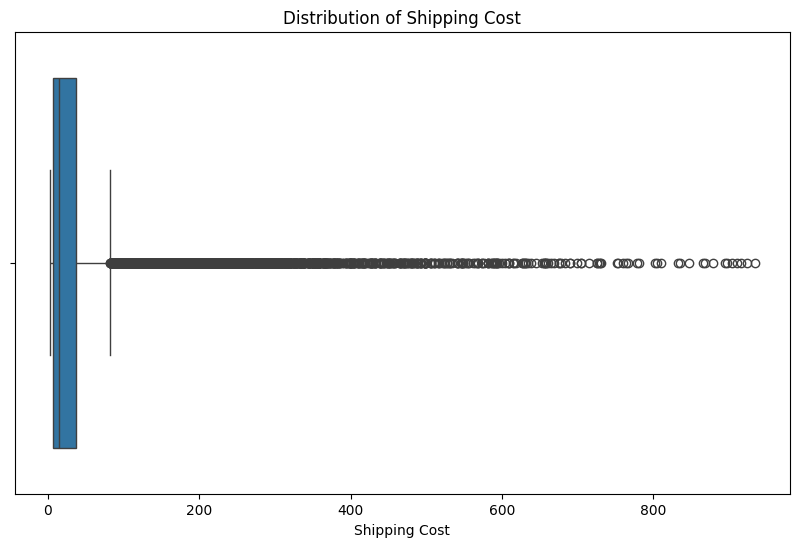

In [14]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f'Outliers in {col}: {df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]}')
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

Checking for skewness in numerical columns

Skewness in Row ID: 0.1387259570490187


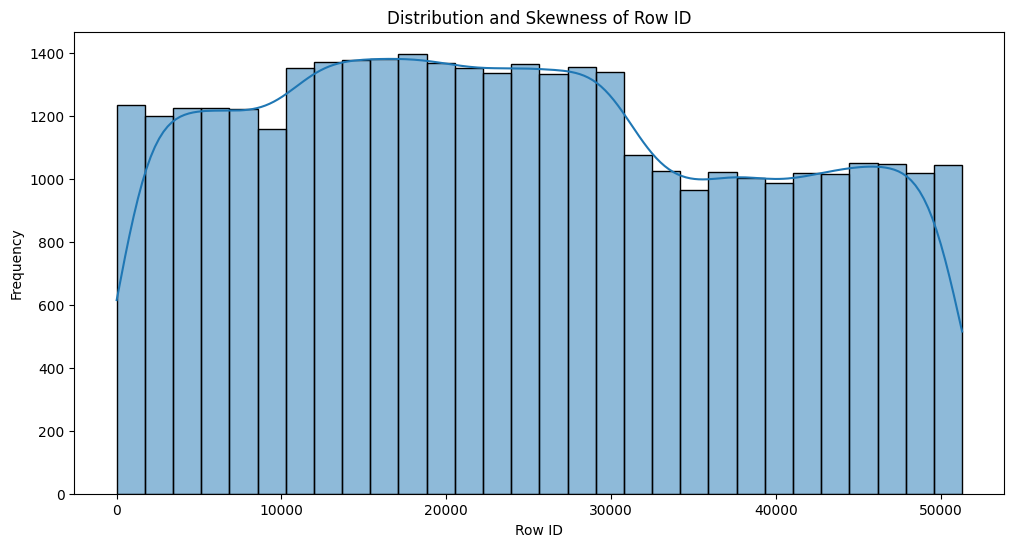

Skewness in Sales: 7.349444890657208


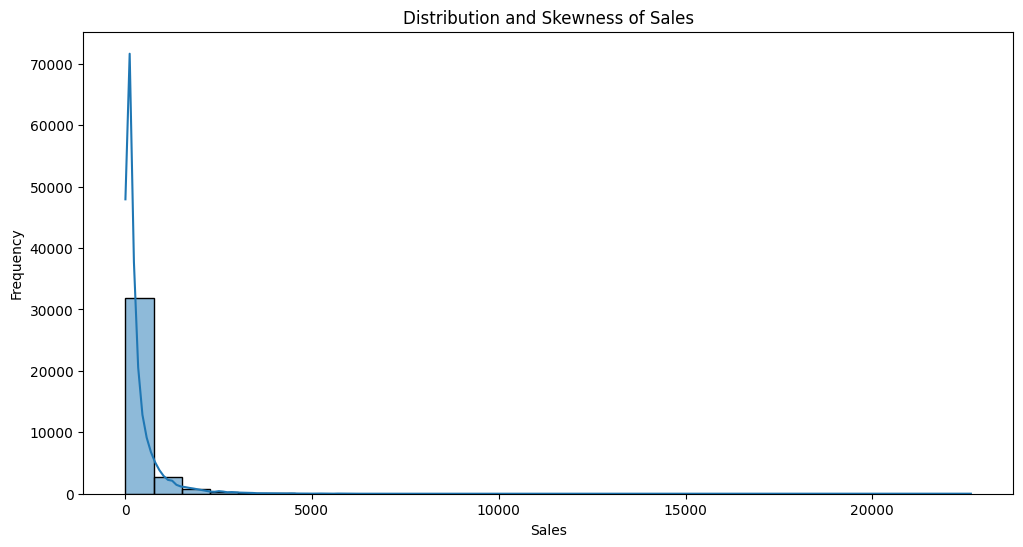

Skewness in Quantity: 1.2224333457944472


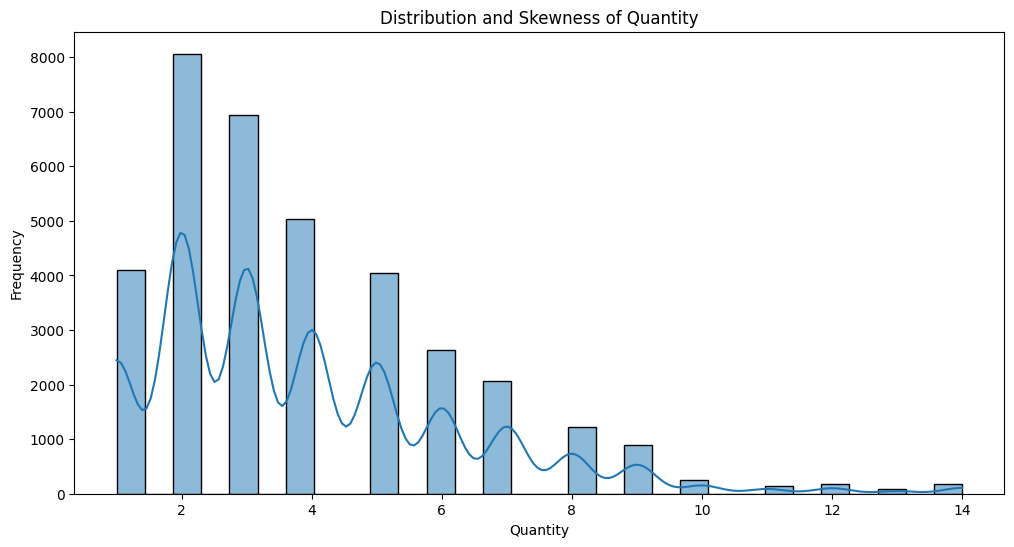

Skewness in Discount: 1.5668659842266202


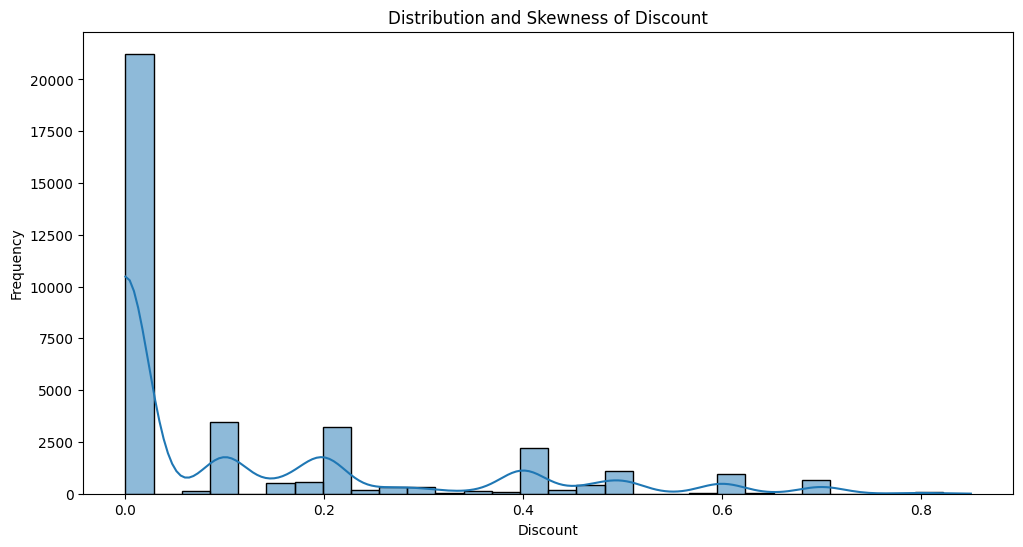

Skewness in Profit: 3.36928371305835


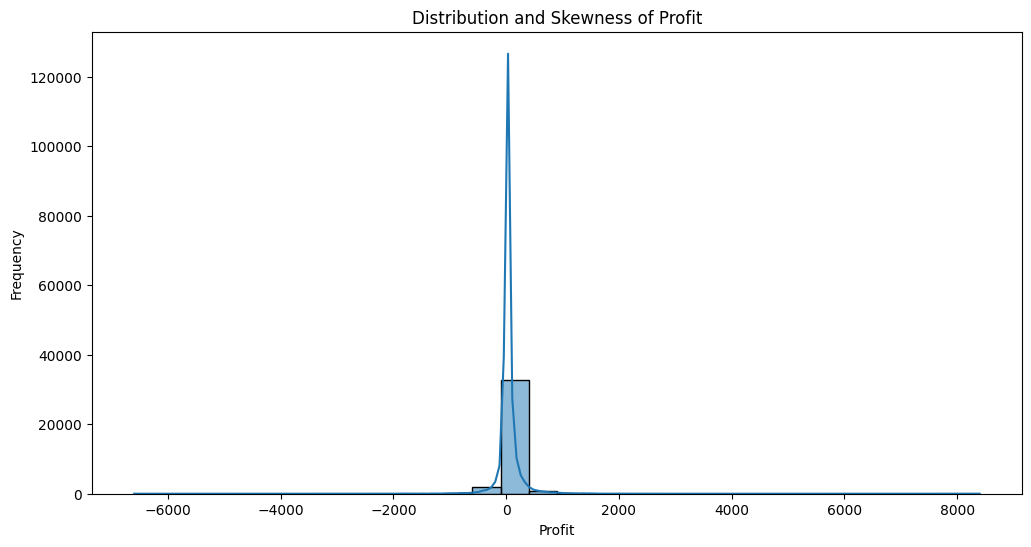

Skewness in Shipping Cost: 5.0930013234145495


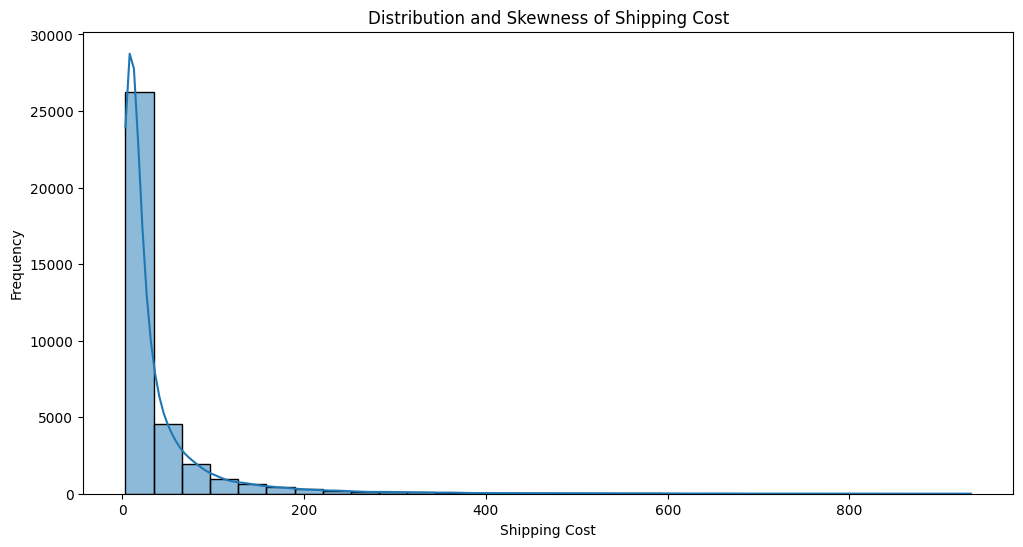

In [15]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f'Skewness in {col}: {df[col].skew()}')
    plt.figure(figsize=(12, 6))

    # Plot histogram with density plot
    sns.histplot(df[col], kde=True, bins=30)  # kde=True adds a density plot
    plt.title(f'Distribution and Skewness of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()


# DATA Visualization
1. Sales and Profit Analysis

a. Scatter Plot: Sales vs. Profit

<Axes: xlabel='Sales', ylabel='Profit'>

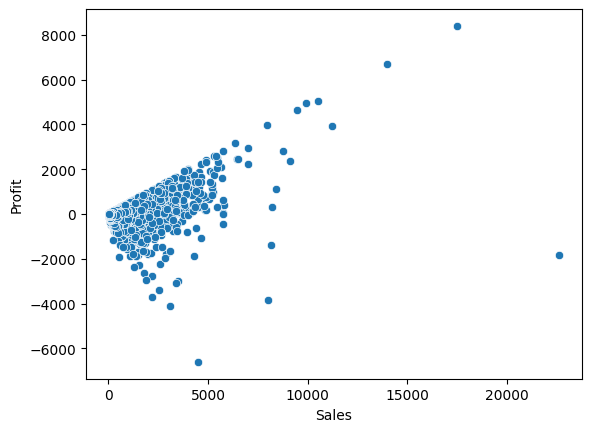

In [16]:
sns.scatterplot(x='Sales', y='Profit', data=df)

The scatter plot shows a positive correlation between sales and profit. This means that as sales increase, profit tends to increase as well. There are a few outliers, which are data points that are far away from the general trend. These outliers could be due to a number of factors, such as a particularly profitable product or a product that was sold at a very high discount. Overall, the scatter plot suggests that there is a strong relationship between sales and profit. This information can be helpful in making decisions about pricing, marketing, and product development.

b. Box Plot: Profit by Category

<Axes: xlabel='Category', ylabel='Profit'>

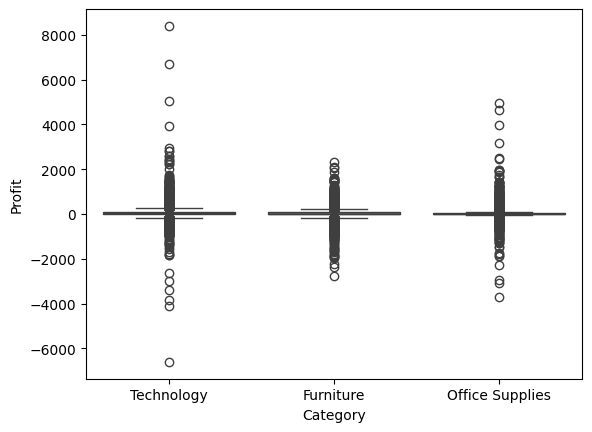

In [17]:
sns.boxplot(x='Category', y='Profit', data=df)

The boxplot shows the distribution of profit for different product categories. We can observe that the technology category has the highest median profit, followed by furniture and then office supplies. It can be inferred that the technology category generates the most profit, and the office supplies category generates the least profit. However, the plot also shows that there are many outliers in the technology and furniture categories. This suggests that there is a lot of variability in the profit generated by these categories. Further investigation is needed to understand the reasons for these outliers, and whether they are driven by certain products within these categories. It would be interesting to look into the specific products driving the outliers to see if they are consistently high or low performers, and to understand why. The boxplot is a useful tool for visualizing the distribution of data, but it does not tell us the whole story. We need to use other tools, such as summary statistics and hypothesis testing, to further analyze the data and draw meaningful conclusions.

2. Sales and Shipping Cost Analysis

a. Pair Plot

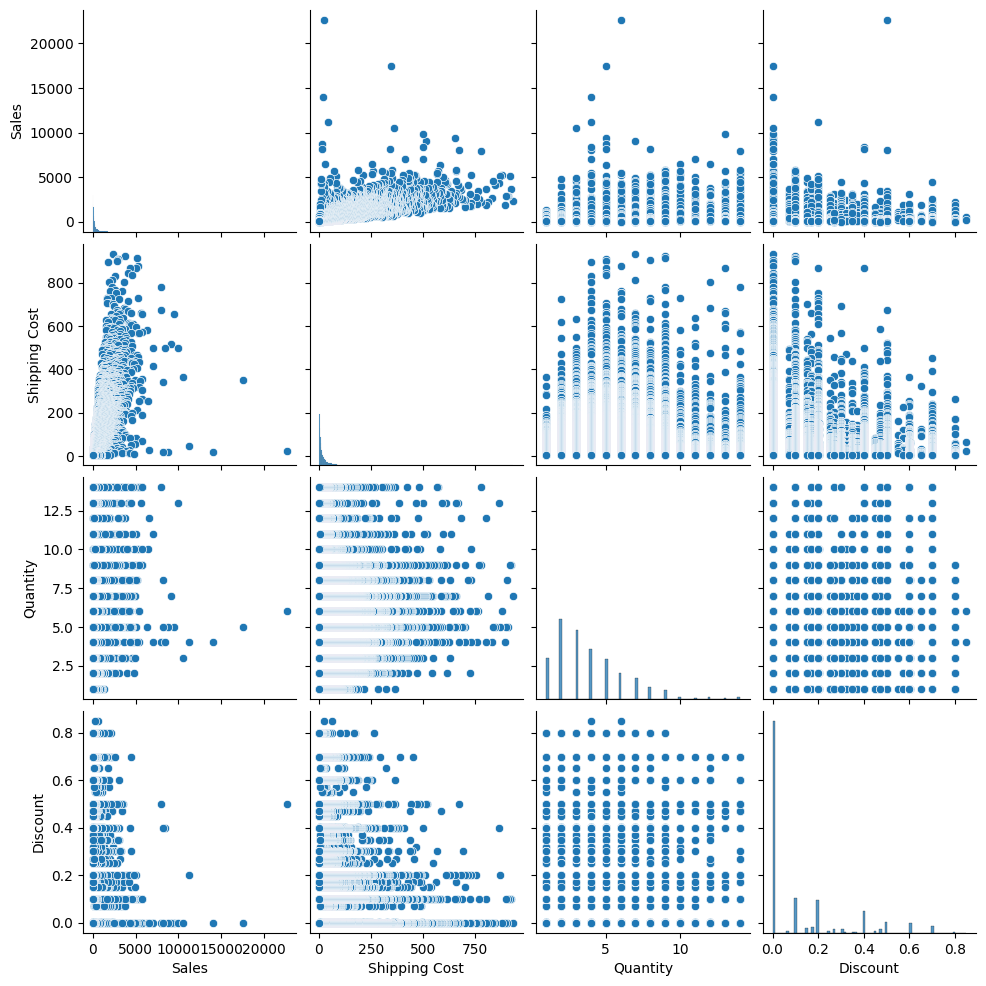

In [18]:
sns.pairplot(df[['Sales', 'Shipping Cost', 'Quantity', 'Discount']])

The strongest correlation is between sales and quantity, followed by sales and shipping cost. It's worth noting that there seems to be no visible correlation between discount and other variables, suggesting that discounts might not have a significant impact on other factors.


3. Customer and Order Insights

a. Bar Plot: Total Sales by Segment

<Axes: xlabel='Segment', ylabel='Sales'>

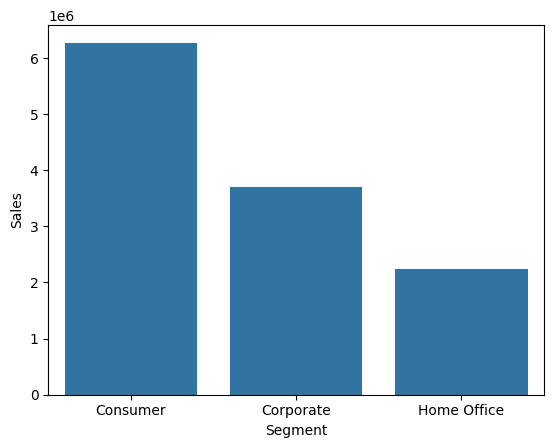

In [19]:
sns.barplot(x='Segment', y='Sales', data=df.groupby('Segment').agg({'Sales': 'sum'}).reset_index())

As we see, Consumer have had more sales than any corporate segment and Home Office Hence, we could do two things here-
1. Retain those Consumers as much as possible
2. Also, try to increase the sales in other two segments by putting in appropriate efforts


b. Pie Chart: Sales Distribution by Market

<Axes: ylabel='Sales'>

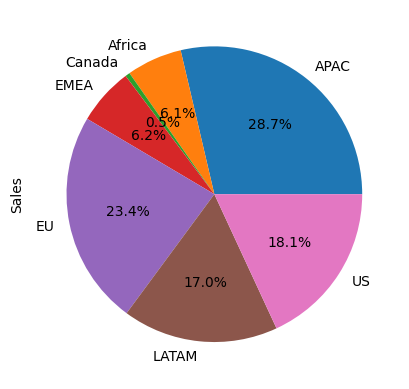

In [20]:
df.groupby('Market')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%')

Sales prove out to be the highest in APAC Market and the least in Canada. We must work on increasing that percentage with appropriate measures.

4. Order Priority and Shipping Analysis

a. Count Plot: Order Priority Distribution

<Axes: xlabel='Order Priority', ylabel='count'>

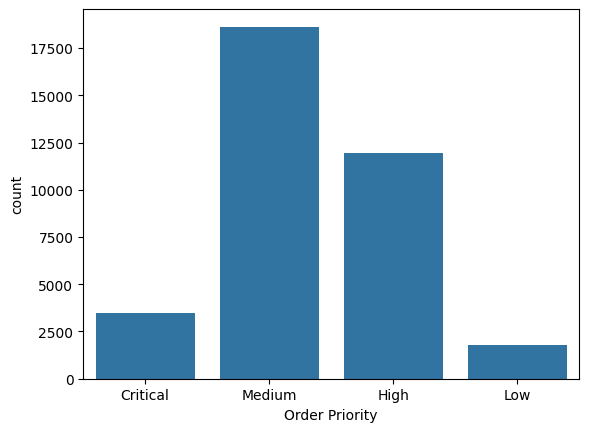

In [21]:
sns.countplot(x='Order Priority', data=df)

b. Box Plot: Shipping Cost by Order Priority

<Axes: xlabel='Order Priority', ylabel='Shipping Cost'>

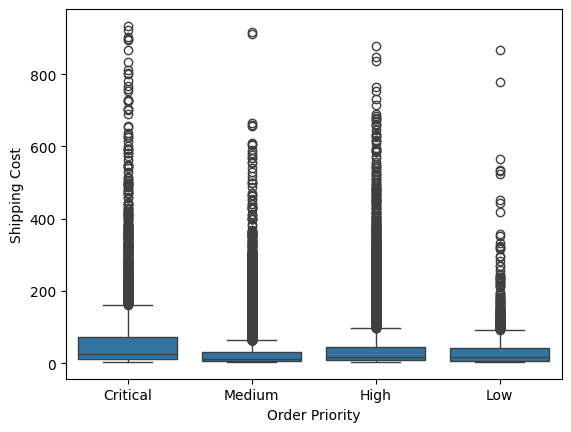

In [22]:
sns.boxplot(x='Order Priority', y='Shipping Cost', data=df)

5. Geographical Analysis

Bar Plot: Total Sales by State

<Axes: xlabel='State', ylabel='Sales'>

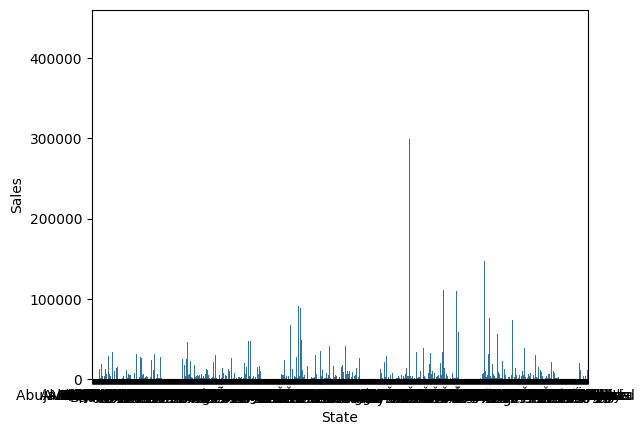

In [26]:
sns.barplot(x='State', y='Sales', data=df.groupby('State').agg({'Sales': 'sum'}).reset_index())

6. Time Series Analysis

Line Plot: Sales Over Time

<Axes: xlabel='Order Date'>

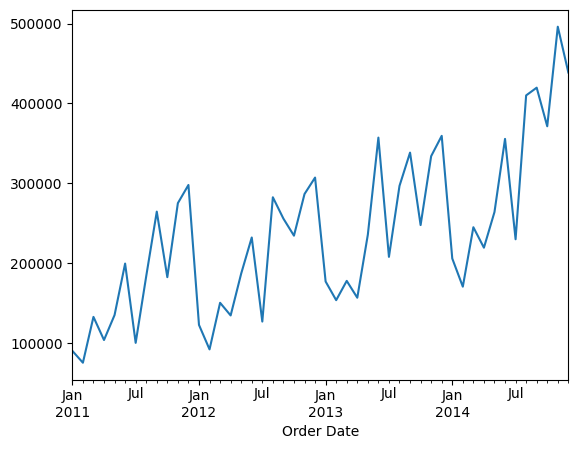

In [27]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().plot(kind='line')


The line graph depicts the monthly sales trend from January 2011 to August 2014.

We can observe that the sales have been fluctuating throughout the period, with a general upward trend.

The highest sales were recorded in August 2014, while the lowest sales were observed in January 2011.

The trend suggests a steady increase in sales over the period, indicating business growth or positive market conditions.
However, there are some seasonal fluctuations, with peaks in certain months and dips in others.

Further analysis can be done to understand the factors influencing these fluctuations, such as promotional campaigns, product launches, or seasonal demand patterns.

7. Discount and Profit Analysis

a. Scatter Plot: Discount vs. Profit

<Axes: xlabel='Discount', ylabel='Profit'>

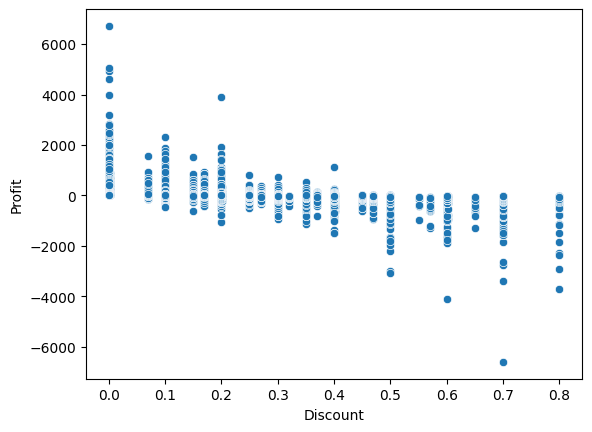

In [29]:
sns.scatterplot(x='Discount', y='Profit', data=df)

The scatter plot shows the relationship between discount and profit. There is no clear linear relationship between the two variables.

However, we can see that the profit generally decreases as the discount increases. This suggests that there might be a negative correlation between discount and profit.

However, it's important to note that this is not a strong correlation and there are many other factors that could be influencing profit, apart from discount.

b. Violin Plot: Profit by Discount Range

<Axes: xlabel='Discount Range', ylabel='Profit'>

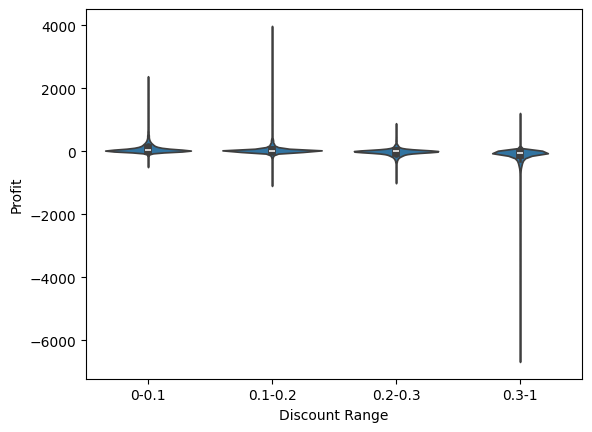

In [30]:
df['Discount Range'] = pd.cut(df['Discount'], bins=[0, 0.1, 0.2, 0.3, 1], labels=['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-1'])
sns.violinplot(x='Discount Range', y='Profit', data=df)

The violinplot shows that the discount range of 0.1-0.2 is the most profitable for the company. The profit for the other discount ranges is less, and the profit for the discount range of 0.3-1 is particularly low.